### Load Library

In [14]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

### Load in Test and Validation Data

- y_test and y_val labels have to be converted to integer for roc computation
- x_test and x_val needs to have certain columns dropped

In [2]:
## Load in Test Set
X_test_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_test_enc.parquet"
X_test = pd.read_parquet(X_test_path)

y_test_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_test.parquet"
y_test = pd.read_parquet(y_test_path)
y_test = pd.DataFrame(y_test['label'].astype(int)) ## convert labels to int for roc and auc calculation

## Load in Validation Set
X_val_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_val_enc.parquet"
X_val = pd.read_parquet(X_val_path)

y_val_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_val.parquet"
y_val = pd.read_parquet(y_val_path)
y_val = pd.DataFrame(y_val['label'].astype(int))

In [3]:
## need to drop columns for X validation and test data
X_val_25 = X_val.drop(['dwelling_time_50', 'dwelling_time_75', 'dwelling_time_mean', 'std_50', 'std_75', 'std_mean', 'mean_50', 'mean_75', 'mean_mean'], axis = 1)
X_val_50 = X_val.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
X_val_75 = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
X_val_mean = X_val.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

X_test_25 = X_test.drop(['dwelling_time_50', 'dwelling_time_75', 'dwelling_time_mean', 'std_50', 'std_75', 'std_mean', 'mean_50', 'mean_75', 'mean_mean'], axis = 1)
X_test_50 = X_test.drop(['dwelling_time_25', 'dwelling_time_75', 'dwelling_time_mean', 'std_25', 'std_75', 'std_mean', 'mean_25', 'mean_75', 'mean_mean'], axis = 1)
X_test_75 = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_mean', 'std_25', 'std_50', 'std_mean', 'mean_25', 'mean_50', 'mean_mean'], axis = 1)
X_test_mean = X_test.drop(['dwelling_time_25', 'dwelling_time_50', 'dwelling_time_75', 'std_25', 'std_50', 'std_75', 'mean_25', 'mean_50', 'mean_75'], axis = 1)

### Create Function for Basic Multi-Layer Perceptron Classification

link to understand MLP different parameters

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [18]:
def mlp(x_train, y_train, x_val, y_val, x_test, y_test, variable):
    ## create classifier
    clf = MLPClassifier(activation = 'logistic', solver = 'adam')

    ## train the model
    clf.fit(x_train, y_train)

    ## get validation and test predicition
    y_val_pred = clf.predict(x_val)
    print('Accuracy of multi-layer perceptron classifier on validation set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_val, y_val_pred)))
   
    y_test_pred = clf.predict(x_test)
    print('Accuracy of multi-layer perceptron classifier on test set using {}: {:.2f}'.format(variable, metrics.accuracy_score(y_test, y_test_pred)))

    ## define metrics for roc
    y_test_pred_proba = clf.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    mlp_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    
    ## create roc curve   
    plt.figure()
    plt.plot(fpr, tpr, label = 'Mulit-Layer Perceptron Classifier (area = %0.2f)' % mlp_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Modelling on 25th Quantile

In [5]:
## Load Datasets
X_train_25_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_25.parquet" ## to edit file path
X_train_25 = pd.read_parquet(X_train_25_path)

y_train_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/y_train.parquet"
y_train = pd.read_parquet(y_train_path)
y_train = pd.DataFrame(y_train['label'].astype(int))

In [16]:
print(f"Number of Rows for X_train_25 and y_train: {len(X_train_25)}, {len(y_train)}")
print(f"Number of Rows for X_test_25 and y_test: {len(X_test_25)}, {len(y_test)}")
print(f"Number of Rows for X_val_25 and y_val: {len(X_val_25)}, {len(y_val)}")

Number of Rows for X_train_25 and y_train: 51567, 51567
Number of Rows for X_test_25 and y_test: 16275, 16275
Number of Rows for X_val_25 and y_val: 17434, 17434


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of multi-layer perceptron classifier on validation set using 25th quantile: 0.93
Accuracy of multi-layer perceptron classifier on test set using 25th quantile: 0.94


OSError: [Errno 30] Read-only file system: 'Log_ROC.png'

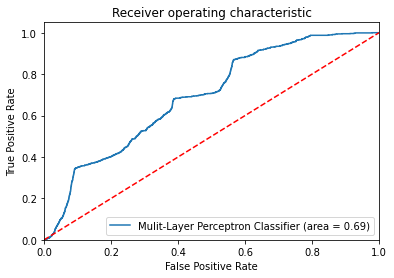

In [19]:
mlp(X_train_25, y_train, X_val_25, y_val, X_test_25, y_test, "25th quantile")

# Modelling on 50th Quantile

In [8]:
## Load Datasets
X_train_50_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_50.parquet" ## to edit file path
X_train_50 = pd.read_parquet(X_train_50_path)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of multi-layer perceptron classifier on validation set using 50th quantile: 0.93
Accuracy of multi-layer perceptron classifier on test set using 50th quantile: 0.94


OSError: [Errno 30] Read-only file system: 'Log_ROC.png'

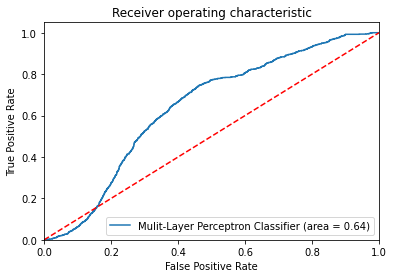

In [20]:
mlp(X_train_50, y_train, X_val_50, y_val, X_test_50, y_test, "50th quantile")

# Modelling on 75th Quantile

In [22]:
## Load Datasets
X_train_75_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_75.parquet" ## to edit file path
X_train_75 = pd.read_parquet(X_train_75_path)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of multi-layer perceptron classifier on validation set using 75th quantile: 0.93
Accuracy of multi-layer perceptron classifier on test set using 75th quantile: 0.94


OSError: [Errno 30] Read-only file system: 'Log_ROC.png'

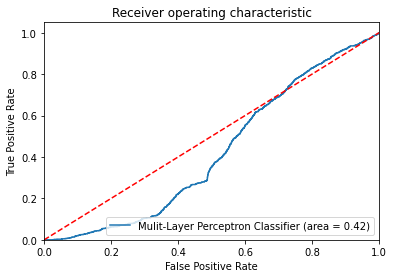

In [23]:
mlp(X_train_75, y_train, X_val_75, y_val, X_test_75, y_test, "75th quantile")

# Modelling on Mean

In [24]:
## Load Datasets
X_train_mean_path = "/Users/claudia/DSA4262-ACMXZ/data/preprocessed_data/X_train_mean.parquet" ## to edit file path
X_train_mean = pd.read_parquet(X_train_mean_path)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of multi-layer perceptron classifier on validation set using mean: 0.93
Accuracy of multi-layer perceptron classifier on test set using mean: 0.94


OSError: [Errno 30] Read-only file system: 'Log_ROC.png'

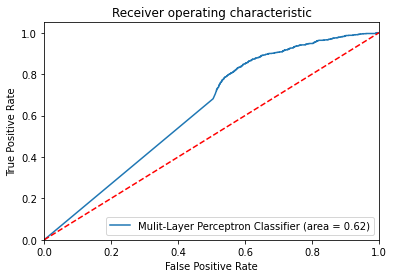

In [25]:
mlp(X_train_mean, y_train, X_val_mean, y_val, X_test_mean, y_test, "mean")